In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd

# Plot the SFH UGC12633 in pixels and averaged in rings

## Read the SFH table

In [2]:
sfh = Table.read('/Users/tonywong/Scratch2/EDGE/pybase/dr3_allpix.pipe3d.hdf5', path='SFH')
sfh_gal = sfh[sfh['Name'] == 'UGC12633']
sfh_gal

Name,ix,iy,ra_abs,dec_abs,ra_off,dec_off,rad_arc,azi_ang,lumfrac_age_0.0010,lumfrac_age_0.0030,lumfrac_age_0.0040,lumfrac_age_0.0056,lumfrac_age_0.0089,lumfrac_age_0.0100,lumfrac_age_0.0126,lumfrac_age_0.0141,lumfrac_age_0.0178,lumfrac_age_0.0199,lumfrac_age_0.0251,lumfrac_age_0.0316,lumfrac_age_0.0398,lumfrac_age_0.0562,lumfrac_age_0.0630,lumfrac_age_0.0631,lumfrac_age_0.0708,lumfrac_age_0.1000,lumfrac_age_0.1122,lumfrac_age_0.1259,lumfrac_age_0.1585,lumfrac_age_0.1995,lumfrac_age_0.2818,lumfrac_age_0.3548,lumfrac_age_0.5012,lumfrac_age_0.7079,lumfrac_age_0.8913,lumfrac_age_1.1220,lumfrac_age_1.2589,lumfrac_age_1.4125,lumfrac_age_1.9953,lumfrac_age_2.5119,lumfrac_age_3.5481,lumfrac_age_4.4668,lumfrac_age_6.3096,lumfrac_age_7.9433,lumfrac_age_10.0000,lumfrac_age_12.5893,lumfrac_age_14.1254,lumfrac_met_0.0037,lumfrac_met_0.0076,lumfrac_met_0.0190,lumfrac_met_0.0315,e_lumfrac_age_0.0010,e_lumfrac_age_0.0030,e_lumfrac_age_0.0040,e_lumfrac_age_0.0056,e_lumfrac_age_0.0089,e_lumfrac_age_0.0100,e_lumfrac_age_0.0126,e_lumfrac_age_0.0141,e_lumfrac_age_0.0178,e_lumfrac_age_0.0199,e_lumfrac_age_0.0251,e_lumfrac_age_0.0316,e_lumfrac_age_0.0398,e_lumfrac_age_0.0562,e_lumfrac_age_0.0630,e_lumfrac_age_0.0631,e_lumfrac_age_0.0708,e_lumfrac_age_0.1000,e_lumfrac_age_0.1122,e_lumfrac_age_0.1259,e_lumfrac_age_0.1585,e_lumfrac_age_0.1995,e_lumfrac_age_0.2818,e_lumfrac_age_0.3548,e_lumfrac_age_0.5012,e_lumfrac_age_0.7079,e_lumfrac_age_0.8913,e_lumfrac_age_1.1220,e_lumfrac_age_1.2589,e_lumfrac_age_1.4125,e_lumfrac_age_1.9953,e_lumfrac_age_2.5119,e_lumfrac_age_3.5481,e_lumfrac_age_4.4668,e_lumfrac_age_6.3096,e_lumfrac_age_7.9433,e_lumfrac_age_10.0000,e_lumfrac_age_12.5893,e_lumfrac_age_14.1254,e_lumfrac_met_0.0037,e_lumfrac_met_0.0076,e_lumfrac_met_0.0190,e_lumfrac_met_0.0315,massfrac_age_0.0010,massfrac_age_0.0030,massfrac_age_0.0040,massfrac_age_0.0056,massfrac_age_0.0089,massfrac_age_0.0100,massfrac_age_0.0126,massfrac_age_0.0141,massfrac_age_0.0178,massfrac_age_0.0199,massfrac_age_0.0251,massfrac_age_0.0316,massfrac_age_0.0398,massfrac_age_0.0562,massfrac_age_0.0630,massfrac_age_0.0631,massfrac_age_0.0708,massfrac_age_0.1000,massfrac_age_0.1122,massfrac_age_0.1259,massfrac_age_0.1585,massfrac_age_0.1995,massfrac_age_0.2818,massfrac_age_0.3548,massfrac_age_0.5012,massfrac_age_0.7079,massfrac_age_0.8913,massfrac_age_1.1220,massfrac_age_1.2589,massfrac_age_1.4125,massfrac_age_1.9953,massfrac_age_2.5119,massfrac_age_3.5481,massfrac_age_4.4668,massfrac_age_6.3096,massfrac_age_7.9433,massfrac_age_10.0000,massfrac_age_12.5893,massfrac_age_14.1254,massfrac_met_0.0037,massfrac_met_0.0076,massfrac_met_0.0190,massfrac_met_0.0315,f_young
,,,deg,deg,deg,deg,arcsec,deg,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,
bytes23,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float3

In [3]:
galname=sfh_gal['Name'][0]
galname

'UGC12633'

## Keep only mass fraction columns and galactocentric radius

In [4]:
subtab = Table(sfh_gal.columns[9+43+43:9+43+43+39])
subtab.add_column(sfh_gal['rad_arc'], index=0)
subtab

rad_arc,massfrac_age_0.0010,massfrac_age_0.0030,massfrac_age_0.0040,massfrac_age_0.0056,massfrac_age_0.0089,massfrac_age_0.0100,massfrac_age_0.0126,massfrac_age_0.0141,massfrac_age_0.0178,massfrac_age_0.0199,massfrac_age_0.0251,massfrac_age_0.0316,massfrac_age_0.0398,massfrac_age_0.0562,massfrac_age_0.0630,massfrac_age_0.0631,massfrac_age_0.0708,massfrac_age_0.1000,massfrac_age_0.1122,massfrac_age_0.1259,massfrac_age_0.1585,massfrac_age_0.1995,massfrac_age_0.2818,massfrac_age_0.3548,massfrac_age_0.5012,massfrac_age_0.7079,massfrac_age_0.8913,massfrac_age_1.1220,massfrac_age_1.2589,massfrac_age_1.4125,massfrac_age_1.9953,massfrac_age_2.5119,massfrac_age_3.5481,massfrac_age_4.4668,massfrac_age_6.3096,massfrac_age_7.9433,massfrac_age_10.0000,massfrac_age_12.5893,massfrac_age_14.1254
arcsec,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction,fraction
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
49.412,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
48.973,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
48.559,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
48.173,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47.813,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47.481,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47.178,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
46.903,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Now we can derive a cumulative SFH for each pixel

In [5]:
df = subtab.to_pandas()
# First drop all rows (pixels) that are completely NaN
df.dropna(how='all', subset=df.columns.difference(['rad_arc']), inplace=True)

In [6]:
df0 = df.fillna(0)  # Replace NaN values with zero fraction
df0

,rad_arc,massfrac_age_0.0010,massfrac_age_0.0030,massfrac_age_0.0040,massfrac_age_0.0056,massfrac_age_0.0089,massfrac_age_0.0100,massfrac_age_0.0126,massfrac_age_0.0141,massfrac_age_0.0178,...,massfrac_age_1.4125,massfrac_age_1.9953,massfrac_age_2.5119,massfrac_age_3.5481,massfrac_age_4.4668,massfrac_age_6.3096,massfrac_age_7.9433,massfrac_age_10.0000,massfrac_age_12.5893,massfrac_age_14.1254
33,50.436066,0.000123,0.0,0.000000,0.0,0.000202,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.081413,0.0,0.0,0.275265,0.162008,0.0,0.065553,0.177751
38,53.237190,0.000123,0.0,0.000000,0.0,0.000202,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.081413,0.0,0.0,0.275265,0.162008,0.0,0.065553,0.177751
105,49.065868,0.000123,0.0,0.000000,0.0,0.000202,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.081413,0.0,0.0,0.275265,0.162008,0.0,0.065553,0.177751
106,49.583237,0.000123,0.0,0.000000,0.0,0.000202,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.081413,0.0,0.0,0.275265,0.162008,0.0,0.065553,0.177751
107,50.124138,0.000123,0.0,0.000000,0.0,0.000202,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.081413,0.0,0.0,0.275265,0.162008,0.0,0.065553,0.177751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,48.162613,0.000670,0.0,0.000327,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.042045,0.0,0.060380,0.0,0.0,0.270036,0.000000,0.0,0.318737,0.000000
5374,48.101959,0.000670,0.0,0.000327,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.042045,0.0,0.060380,0.0,0.0,0.270036,0.000000,0.0,0.318737,0.000000
5436,51.387497,0.000000,0.0,0.000000,0.0,0.005017,0.009694,0.004705,0.0,0.0,...,0.000000,0.0,0.258668,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5437,51.064053,0.000000,0.0,0.000000,0.0,0.005017,0.009694,0.004705,0.0,0.0,...,0.000000,0.0,0.258668,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [7]:
df_cum = pd.concat([df0[['rad_arc']], df0.iloc[:,1:].cumsum(axis=1)],axis=1)
df_cum

,rad_arc,massfrac_age_0.0010,massfrac_age_0.0030,massfrac_age_0.0040,massfrac_age_0.0056,massfrac_age_0.0089,massfrac_age_0.0100,massfrac_age_0.0126,massfrac_age_0.0141,massfrac_age_0.0178,...,massfrac_age_1.4125,massfrac_age_1.9953,massfrac_age_2.5119,massfrac_age_3.5481,massfrac_age_4.4668,massfrac_age_6.3096,massfrac_age_7.9433,massfrac_age_10.0000,massfrac_age_12.5893,massfrac_age_14.1254
33,50.436066,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
38,53.237190,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
105,49.065868,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
106,49.583237,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
107,50.124138,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,48.162613,0.000670,0.000670,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,...,0.350846,0.350846,0.411226,0.411226,0.411226,0.681263,0.681263,0.681263,1.000000,1.0
5374,48.101959,0.000670,0.000670,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,...,0.350846,0.350846,0.411226,0.411226,0.411226,0.681263,0.681263,0.681263,1.000000,1.0
5436,51.387497,0.000000,0.000000,0.000000,0.000000,0.005017,0.014711,0.019416,0.019416,0.019416,...,0.741332,0.741332,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
5437,51.064053,0.000000,0.000000,0.000000,0.000000,0.005017,0.014711,0.019416,0.019416,0.019416,...,0.741332,0.741332,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [8]:
df_cum.columns = df_cum.columns.str.replace('massfrac_age_', '')

In [9]:
df_cum.loc[2000]

rad_arc    36.588036
0.0010      0.000000
0.0030      0.000000
0.0040      0.000000
0.0056      0.000000
0.0089      0.000000
0.0100      0.000000
0.0126      0.000000
0.0141      0.000000
0.0178      0.000000
0.0199      0.000000
0.0251      0.000000
0.0316      0.000000
0.0398      0.000000
0.0562      0.000000
0.0630      0.000000
0.0631      0.000000
0.0708      0.000000
0.1000      0.000000
0.1122      0.000000
0.1259      0.000000
0.1585      0.000745
0.1995      0.000745
0.2818      0.000745
0.3548      0.015014
0.5012      0.032212
0.7079      0.131571
0.8913      0.233343
1.1220      0.382715
1.2589      0.382715
1.4125      0.540974
1.9953      0.540974
2.5119      0.540974
3.5481      0.540974
4.4668      0.540974
6.3096      1.000000
7.9433      1.000000
10.0000     1.000000
12.5893     1.000000
14.1254     1.000000
Name: 2000, dtype: float32

## 1) Plot the cumulative SFH vs time for individual pixels

In [10]:
pixtab = df_cum.drop(columns=['rad_arc']).T.reset_index(names='Age')
pixtab

,Age,33,38,105,106,107,109,110,174,175,...,5366,5369,5370,5371,5372,5373,5374,5436,5437,5442
0,0.0010,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,...,0.000000,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000000,0.000000,0.000670
1,0.0030,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,...,0.000000,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000000,0.000000,0.000670
2,0.0040,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,...,0.000000,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.000000,0.000000,0.000997
3,0.0056,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,...,0.000000,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.000000,0.000000,0.000997
4,0.0089,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.005017,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.005017,0.005017,0.000997
5,0.0100,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.014711,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.014711,0.014711,0.000997
6,0.0126,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.019416,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.019416,0.019416,0.000997
7,0.0141,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.019416,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.019416,0.019416,0.000997
8,0.0178,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.019416,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.019416,0.019416,0.000997
9,0.0199,0.000954,0.000954,0.000954,0.000954,0.000954,0.000954,0.000954,0.000954,0.000954,...,0.019416,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.019416,0.019416,0.000997


In [11]:
pixtab['Age'] = pixtab['Age'].astype(float)

<Axes: xlabel='Age'>

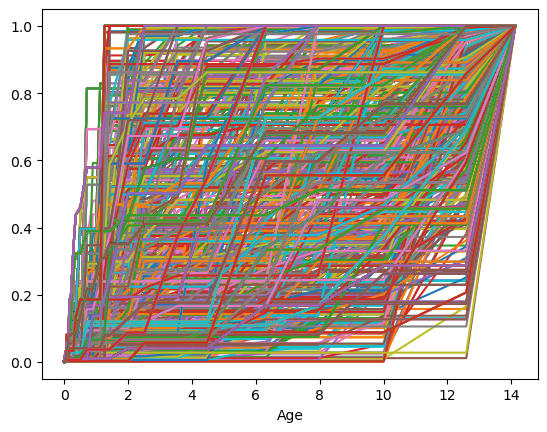

In [12]:
pixtab.plot(x='Age',legend=False)

## 2) Plot the cumulative SFH vs time for binned ranges in radius.

In [13]:
df_cum

,rad_arc,0.0010,0.0030,0.0040,0.0056,0.0089,0.0100,0.0126,0.0141,0.0178,...,1.4125,1.9953,2.5119,3.5481,4.4668,6.3096,7.9433,10.0000,12.5893,14.1254
33,50.436066,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
38,53.237190,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
105,49.065868,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
106,49.583237,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
107,50.124138,0.000123,0.000123,0.000123,0.000123,0.000326,0.000326,0.000326,0.000326,0.000326,...,0.238010,0.238010,0.319423,0.319423,0.319423,0.594688,0.756696,0.756696,0.822249,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,48.162613,0.000670,0.000670,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,...,0.350846,0.350846,0.411226,0.411226,0.411226,0.681263,0.681263,0.681263,1.000000,1.0
5374,48.101959,0.000670,0.000670,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,0.000997,...,0.350846,0.350846,0.411226,0.411226,0.411226,0.681263,0.681263,0.681263,1.000000,1.0
5436,51.387497,0.000000,0.000000,0.000000,0.000000,0.005017,0.014711,0.019416,0.019416,0.019416,...,0.741332,0.741332,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
5437,51.064053,0.000000,0.000000,0.000000,0.000000,0.005017,0.014711,0.019416,0.019416,0.019416,...,0.741332,0.741332,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [14]:
radcuts = pd.cut(df_cum['rad_arc'],[0,10,20,30,40,50,60])

In [15]:
df_radbin = df_cum.groupby(radcuts).mean()
df_radbin

/var/folders/8c/cnzsvjvj56z1g2f7pg6kkvww0000gn/T/ipykernel_28310/2710556063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_radbin = df_cum.groupby(radcuts).mean()


,rad_arc,0.0010,0.0030,0.0040,0.0056,0.0089,0.0100,0.0126,0.0141,0.0178,...,1.4125,1.9953,2.5119,3.5481,4.4668,6.3096,7.9433,10.0000,12.5893,14.1254
rad_arc,,,,,,,,,,,,,,,,,,,,,
"(0, 10]",6.618413,0.000133,0.000157,0.000193,0.000207,0.000917,0.001132,0.001190,0.001302,0.001648,...,0.152304,0.174917,0.209780,0.227516,0.239534,0.320283,0.388385,0.446756,0.810174,1.0
"(10, 20]",15.495555,0.000148,0.000310,0.000459,0.000678,0.000829,0.000852,0.000908,0.000968,0.001056,...,0.354034,0.450110,0.506417,0.560530,0.589607,0.648273,0.683348,0.735302,0.842728,1.0
"(20, 30]",25.312918,0.000444,0.000560,0.000649,0.000700,0.000792,0.000803,0.000880,0.000951,0.000963,...,0.287758,0.351447,0.398664,0.429488,0.471040,0.581032,0.665836,0.757606,0.855648,1.0
"(30, 40]",34.867409,0.000903,0.000961,0.001001,0.001006,0.001316,0.001410,0.001497,0.001620,0.001652,...,0.227628,0.255457,0.292509,0.308815,0.340952,0.480372,0.589473,0.692910,0.773818,1.0
"(40, 50]",44.023613,0.000837,0.000897,0.000981,0.001021,0.001557,0.001943,0.002199,0.002324,0.002481,...,0.268307,0.296987,0.337003,0.354366,0.362176,0.514094,0.595492,0.669451,0.758317,1.0
"(50, 60]",52.378788,0.001811,0.001858,0.001972,0.001985,0.002146,0.002437,0.002820,0.002820,0.003299,...,0.086705,0.118981,0.148867,0.198973,0.226413,0.480253,0.506660,0.606063,0.664115,1.0


In [16]:
radtab = df_radbin.drop(columns=['rad_arc']).T.reset_index(names='Age')
radtab['Age'] = radtab['Age'].astype(float)
radtab

rad_arc,Age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]"
0,0.0010,0.000133,0.000148,0.000444,0.000903,0.000837,0.001811
1,0.0030,0.000157,0.000310,0.000560,0.000961,0.000897,0.001858
2,0.0040,0.000193,0.000459,0.000649,0.001001,0.000981,0.001972
3,0.0056,0.000207,0.000678,0.000700,0.001006,0.001021,0.001985
4,0.0089,0.000917,0.000829,0.000792,0.001316,0.001557,0.002146
5,0.0100,0.001132,0.000852,0.000803,0.001410,0.001943,0.002437
6,0.0126,0.001190,0.000908,0.000880,0.001497,0.002199,0.002820
7,0.0141,0.001302,0.000968,0.000951,0.001620,0.002324,0.002820
8,0.0178,0.001648,0.001056,0.000963,0.001652,0.002481,0.003299
9,0.0199,0.001776,0.001091,0.000979,0.001709,0.002562,0.003330


Text(0, 0.5, 'cumulative fraction < Age')

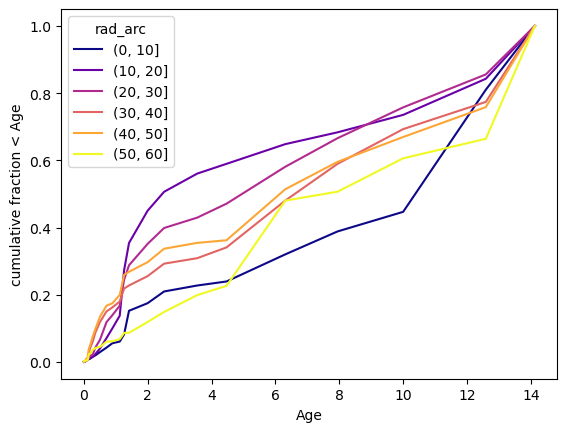

In [17]:
colors = plt.cm.plasma(np.linspace(0, 1, len(df_radbin)))
ax = radtab.plot(x=0, logx=False, legend=True, color=colors)
ax.set_ylabel("cumulative fraction < Age")